In [4]:
import numpy as np
import sys
%cd ../src/fbi/
sys.path.insert(1, os.getcwd())
from optimizers import Optimizer
import matplotlib.pyplot as plt
import time
#  non-convex function to test the performance of methods with optimum at -1,1
fx = lambda x, y: (1 - x)**2 + 100*(y - x**2)**2
x = np.linspace(-3,3,200)
y = np.linspace(-3,3,200)
X, Y = np.meshgrid(x, y)
Z = fx(X,Y)
x = -2.5
y = -2.5
x_init = [x,y]
opt_x = [-1,1]

/home/gwan/Homework/cs107/git/cs107_project/src/fbi


In [8]:
def trace_plot(optimizers, fx,x_init,n_iter):
    x = np.linspace(-3,3,200)
    y = np.linspace(-3,3,200)
    X, Y = np.meshgrid(x, y)
    Z = fx(X,Y)
    fig = plt.figure(figsize = (16,8))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    iter_xs = []
    iter_ys = []
    iter_zs = []
    for k,v in optimizers.items():
        a = 0.000001
        if(k == 'ADAGRAD'):
            a = 0.1
        time,iter_z,iter_xy = v(x_init, fx, n_iter,verbose = True,alpha = a)
        iter_z = np.array(iter_z)
        iter_x = np.array(iter_xy)[:,0]
        iter_y = np.array(iter_xy)[:,1]
        iter_xs.append(iter_x)
        iter_ys.append(iter_y)
        iter_zs.append(iter_z)
        ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
        ax.plot(iter_x,iter_y, iter_z, marker = '*', alpha = .4,label = k)
        ax.legend()
        ax.set_title('f(x,y) = (1 - x)^2 + 100*(y - x^2)^2')
        ax.view_init(65, 34)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
    plt.show()
    return iter_xs,iter_ys,iter_zs

In [9]:
optimizers = {"Momentum": Optimizer.momentum , "ADAGRAD": Optimizer.ADAGRAD,'GradientDescent': Optimizer.gradient_descent}

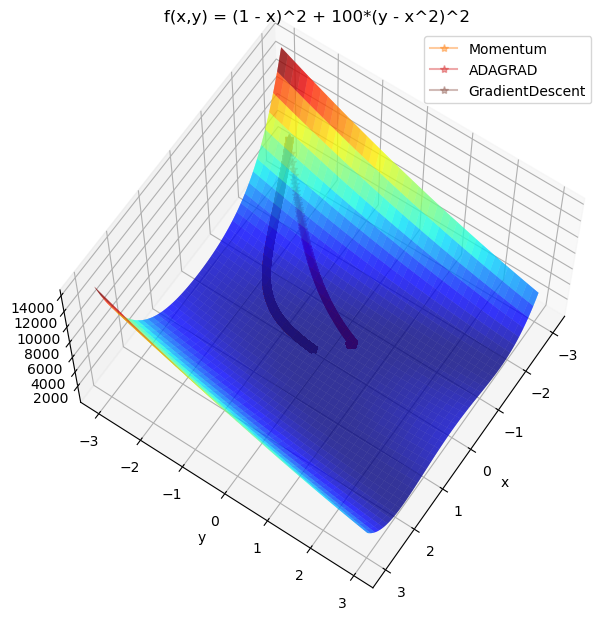

In [10]:
x,y,z = trace_plot(optimizers,fx,x_init,n_iter=10000) # Add more to the input dict for more plots

# Interactive 3D plotly

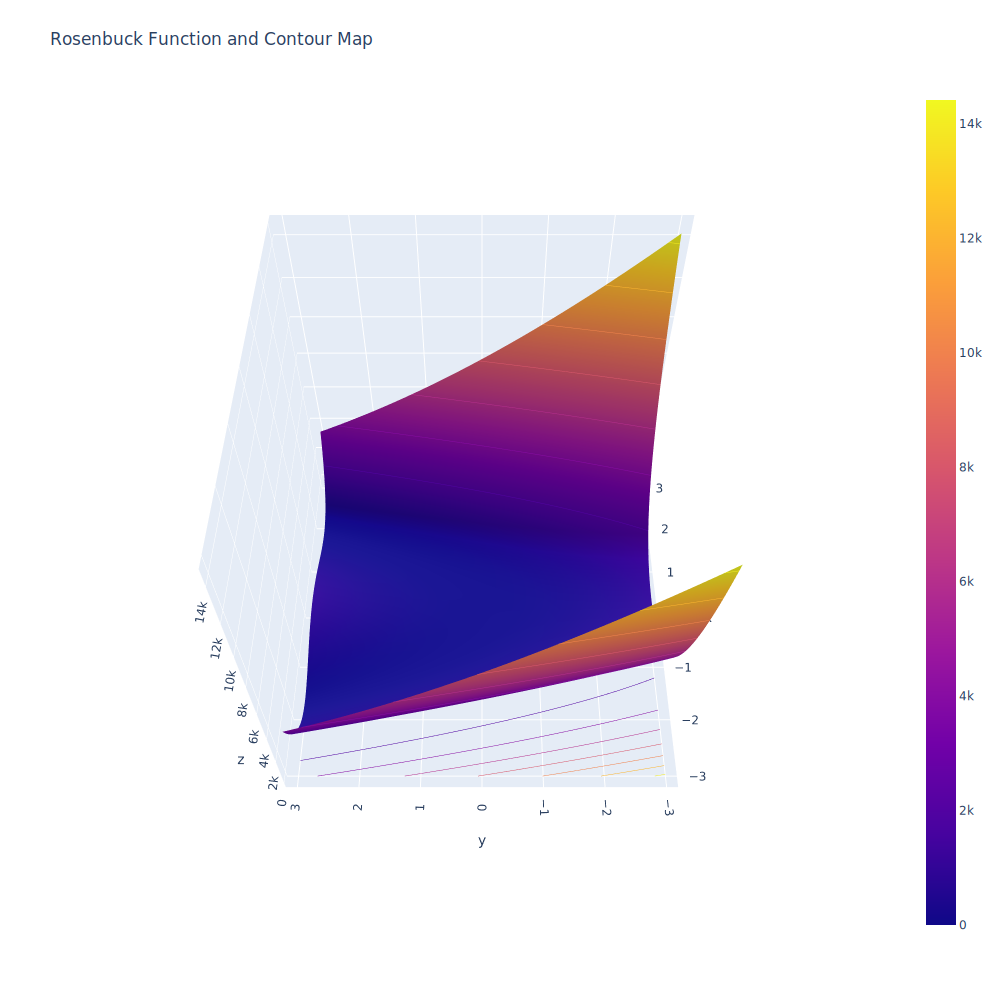

In [19]:
import plotly.graph_objects as go

import pandas as pd


fig = go.Figure(data=[go.Surface(z=Z,x = X, y = Y)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Rosenbuck Function and Contour Map', autosize=False,
                  scene_camera_eye=dict(x=-1.5, y=-0, z=2),
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show(renderer="svg")

In [22]:
import plotly.io as pio


def trace_3dplot(optimizers, fx,x_init,n_iter):
    x = np.linspace(-3,3,200)
    y = np.linspace(-3,3,200)
    X, Y = np.meshgrid(x, y)
    Z = fx(X,Y)
    plots = [go.Surface(z=Z,x = X, y = Y)]
    for k,v in optimizers.items():
        a = 0.000001
        if(k == 'ADAGRAD'):
            a = 0.5
        time,iter_z,iter_xy = v(x_init, fx, n_iter,verbose = True,alpha = a)
        iter_z = np.array(iter_z)
        iter_x = np.array(iter_xy)[:,0]
        iter_y = np.array(iter_xy)[:,1]
        plots.append(go.Scatter3d(x = iter_x,y = iter_y, z = iter_z, mode ='markers',name=k))
    fig = go.Figure(data=plots)
    # fig.update_traces(contours_z=dict(show=True, usecolormap=True,
    #                                 highlightcolor="limegreen", project_z=True))
    fig.update_layout(title='Trace Plot for Three Optimizers in Rosenbuck Function', autosize=False,
                    scene_camera_eye=dict(x=1.5, y=-0, z=2),
                    width=800, height=800,
                    margin=dict(l=65, r=50, b=65, t=90,),
                    legend=dict(orientation="h")
    )
    fig.update_layout(showlegend=True) 
    pio.write_html(fig, file='figure.html', auto_open=True)
    fig.show(renderer="svg")


Command '/usr/bin/x-www-browser' requires the chromium snap to be installed.
Please install it with:

snap install chromium

Try running the update-desktop-database command. If you
don't have this command you should install the
desktop-file-utils package. This package is available from
http://freedesktop.org/wiki/Software/desktop-file-utils/
Can't call method "get_value" on an undefined value at /usr/bin/mimeopen line 159.

Command '/usr/bin/x-www-browser' requires the chromium snap to be installed.
Please install it with:

snap install chromium

/usr/bin/xdg-open: 869: firefox: not found
/usr/bin/xdg-open: 869: iceweasel: not found
/usr/bin/xdg-open: 869: seamonkey: not found
/usr/bin/xdg-open: 869: mozilla: not found
/usr/bin/xdg-open: 869: epiphany: not found
/usr/bin/xdg-open: 869: konqueror: not found
/usr/bin/xdg-open: 869: chromium: not found

Command '/usr/bin/chromium-browser' requires the chromium snap to be installed.
Please install it with:

snap install chromium

/usr/bin

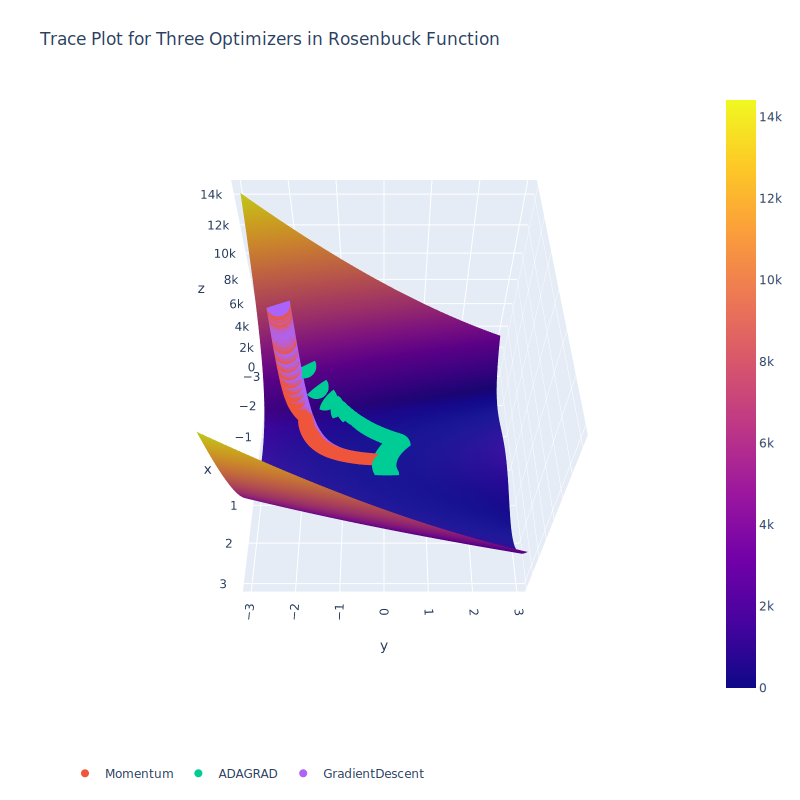

In [23]:
trace_3dplot(optimizers,fx,x_init,n_iter=10000)

In [11]:
out = [[],[],[]]
for i,k in enumerate(optimizers.keys()):
    x[i] = x[i][::10]
    y[i] = y[i][::10]
    z[i] = z[i][::10]
    for j in range(len(x[i])):
        out[i].append((x[i][j],y[i][j],"%.32f" % z[i][j]))
    name = k + '.txt'
    with open(name,'w') as f:
        f.write(str(out[i]))
# This code save txt file which will be used for our actual plot on mathematica which is more beautiful